## <font color='brown'> Importation des données </font>

### <font color='cornflowerblue'> Importation des librairies </font>

In [115]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as stm

from sklearn.neighbors import KNeighborsClassifier

### <font color='cornflowerblue'> Lecture des données de Mouvement </font>

In [116]:
df_mvt=pd.read_excel(r'C:\Users\asus\Desktop\previsionCNSS\data.xlsx')
df_mvt

,ID_ACTEUR,TYPE,nb_mvt,nb_br
0,2,Emp,4,1
1,3,Emp,4,1
2,4,Tns,8,1
3,5,Emp,4,1
4,5,Tns,10,1
...,...,...,...,...
305,1419032,Tns,11,2
306,1419064,Tns,13,2
307,1419091,Tns,4,1
308,1419093,Tns,4,1


### <font color='cornflowerblue'>Les pourcentages de mouvements selon le type d'acteur</font>

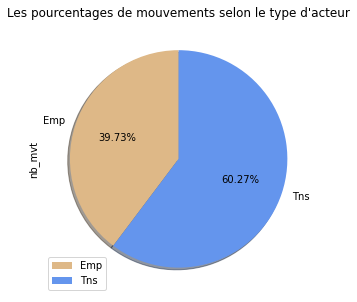

In [117]:
df_mvt.groupby(['TYPE']).sum().plot(kind='pie',y='nb_mvt', shadow=True, startangle=90,figsize=(5,5),
autopct='%1.2f%%', colors=['burlywood','cornflowerblue'],title="Les pourcentages de mouvements selon le type d'acteur")
plt.show()

### <font color='cornflowerblue'>Les pourcentages de Nombre de mouvement selon le Nombre de bureau</font>

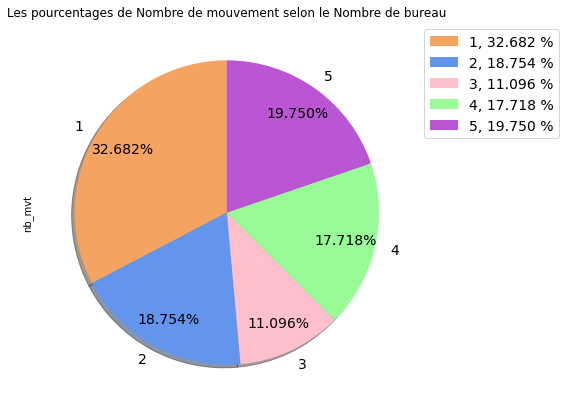

In [118]:
dt=df_mvt.groupby(['nb_br']).sum()
dt['%']=(dt['nb_mvt']/dt['nb_mvt'].sum())*100

labels = ['%s, %1.3f %%' % (l, s) for l, s in zip(dt.index, dt['%'])]

dt.plot(kind='pie',y='nb_mvt', shadow=True, startangle=90,figsize=(8,7),autopct='%1.3f%%',pctdistance = 0.8,
colors=['sandybrown','cornflowerblue','pink','palegreen','mediumorchid','purple'],title="Les pourcentages de Nombre de mouvement selon le Nombre de bureau"
,fontsize=14)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=labels,fontsize=14)
plt.show()


### <font color='cornflowerblue'>Affichage des valeurs min et max des colonnes </font>

In [119]:
print('Les valeurs min de cette DataFrame sont:\n\n',df_mvt.min())
print('\n ***************************************** \n')
print('Les valeurs max de cette DataFrame sont:\n\n',df_mvt.max())

Les valeurs min de cette DataFrame sont:

 ID_ACTEUR      2
TYPE         Emp
nb_mvt         1
nb_br          1
dtype: object

 ***************************************** 

Les valeurs max de cette DataFrame sont:

 ID_ACTEUR    1419151
TYPE             Tns
nb_mvt           287
nb_br              5
dtype: object


In [120]:
#Test sur les lignes nulles
df_mvt.isnull().sum()

ID_ACTEUR    0
TYPE         0
nb_mvt       0
nb_br        0
dtype: int64

## <font color='brown'> Division des données </font>

In [121]:
x=df_mvt[['nb_br']]
y=df_mvt[["nb_mvt"]]
train=np.array(x)
test=np.array(y)

In [122]:
x_train, x_test, y_train , y_test =train_test_split(train,test,test_size=0.2,random_state=2)

### <font color='cornflowerblue'> Présentation de Test et Train Set</font>

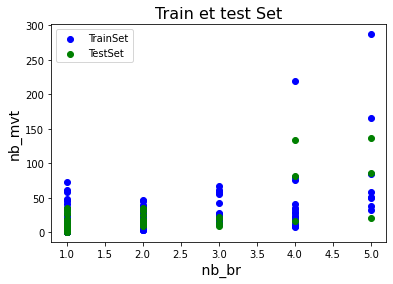

In [123]:
plt.scatter(x_train,y_train, label='TrainSet',color ='blue')
plt.scatter(x_test, y_test, label='TestSet', color='green')
plt.xlabel(' nb_br',fontsize=14)
plt.ylabel('nb_mvt',fontsize=14)
plt.title('Train et test Set',fontsize=16)
plt.legend()
plt.show()

## <font color='brown'> Modèle de Regression OLS en utilisant Statsmodels </font>

In [124]:
model = stm.OLS(y,x)
res=model.fit()
score_mvt1=res.rsquared
print("Le R squared de ce modèle:",score_mvt1)

Le R squared de ce modèle: 0.49649965159483556


In [125]:
print("Le nom de Modèle:",res.model)  
print('\n ***********************************\n')
print("Le nom de variable à prédire est:",res.model.data.ynames) 
print('\n ***********************************\n')
print("Le nom de variable dépendante est:",res.model.data.xnames)


Le nom de Modèle: <statsmodels.regression.linear_model.OLS object at 0x00000219ED71A800>

 ***********************************

Le nom de variable à prédire est: nb_mvt

 ***********************************

Le nom de variable dépendante est: ['nb_br']


In [126]:
y_pred_mvt1=res.fittedvalues
print('Les valeurs prédites :', np.array(y_pred_mvt1).astype(int), sep='\n') #float

Les valeurs prédites :
[11 11 11 11 11 23 11 11 11 11 11 11 11 23 23 11 23 23 35 35 35 35 35 11
 35 35 35 35 35 35 35 58 58 58 58 58 58 35 58 58 46 58 46 46 46 46 23 11
 35 11 35 11 11 11 23 23 11 11 23 23 23 23 11 11 58 23 11 58 11 23 23 23
 23 23 23 11 11 35 11 35 46 46 46 46 46 46 46 46 46 11 46 46 46 46 46 46
 11 35 23 11 11 11 11 11 11 11 11 23 11 11 11 23 11 11 23 11 11 11 11 11
 11 11 23 11 11 11 11 11 11 23 11 11 11 11 11 11 23 11 11 11 11 11 11 11
 11 11 11 11 11 11 23 11 11 11 11 11 35 23 11 11 11 11 11 23 11 11 11 23
 35 11 11 11 11 11 23 11 11 11 11 11 11 11 11 11 11 23 11 23 11 11 11 11
 11 11 11 11 11 11 11 23 11 11 11 11 11 11 11 11 23 11 11 11 11 11 11 23
 23 11 11 23 11 11 11 11 11 11 11 11 11 11 23 11 11 11 11 11 11 11 23 23
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 23 23 11 11 11 23 23 23 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 23 11 11 23 11 23 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 23 11 23 23 11 11 11]


## <font color='brown'> Modèle de Regression Linéaire en utilisant scikit-learn </font>

### <font color='cornflowerblue'> 1) Création de Modèle</font>

In [127]:
reg=LinearRegression()

### <font color='cornflowerblue'> 2) Entraînement de Modèle</font>

In [128]:
reg.fit(x_train, y_train)

LinearRegression()

In [129]:
print(reg.intercept_,reg.coef_) 

[-7.99626719] [[14.92382823]]


In [130]:
print("L'approximation linéaire est donc y = ax+b avec a={} , b={}".format(reg.coef_ , reg.intercept_))
print("Nombre de Mouvement = {} * Nombre de bureau + ({})".format(reg.coef_ , reg.intercept_))

L'approximation linéaire est donc y = ax+b avec a=[[14.92382823]] , b=[-7.99626719]
Nombre de Mouvement = [[14.92382823]] * Nombre de bureau + ([-7.99626719])


### <font color='cornflowerblue'> 3) Evaluation de Modèle </font>

In [131]:
score_mvt2=reg.score(x_test,y_test)
print("Le Score de ce modèle:",score_mvt2)

Le Score de ce modèle: 0.5130071454267723


### <font color='cornflowerblue'> 4) Prédiction des données</font>

#### <font color='lightseagreen'>  Methode 1:</font>

In [132]:
y_pred_mvt2=(reg.predict(x_test)).astype(int)
y_pred_mvt2

array([[ 6],
       [ 6],
       [ 6],
       [51],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [21],
       [21],
       [51],
       [ 6],
       [21],
       [ 6],
       [21],
       [ 6],
       [ 6],
       [21],
       [21],
       [ 6],
       [ 6],
       [36],
       [ 6],
       [36],
       [ 6],
       [ 6],
       [36],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [66],
       [ 6],
       [ 6],
       [21],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [21],
       [ 6],
       [36],
       [ 6],
       [51],
       [ 6],
       [ 6],
       [ 6],
       [66],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [66],
       [21]])

#### <font color='lightseagreen'> Methode 2:</font>

In [133]:
print('intercept:', reg.intercept_)
print('Coef:', reg.coef_)

intercept: [-7.99626719]
Coef: [[14.92382823]]


In [134]:
y_pred_mvt2= (reg.intercept_ + np.sum(reg.coef_ * x_test, axis=1)).astype(int)
y_pred_mvt2

array([ 6,  6,  6, 51,  6,  6,  6,  6,  6, 21, 21, 51,  6, 21,  6, 21,  6,
        6, 21, 21,  6,  6, 36,  6, 36,  6,  6, 36,  6,  6,  6,  6,  6, 66,
        6,  6, 21,  6,  6,  6,  6,  6,  6, 21,  6, 36,  6, 51,  6,  6,  6,
       66,  6,  6,  6,  6,  6,  6,  6,  6, 66, 21])

### <font color='cornflowerblue'> 5) Comparaison des données Actuels et Prédites </font>

In [135]:
df = pd.DataFrame(np.hstack((y_test, y_pred_mvt2.reshape(-1, 1))),columns=['y_test', 'y_pred_mvt2'])
df

,y_test,y_pred_mvt2
0,4,6
1,4,6
2,4,6
3,81,51
4,8,6
...,...,...
57,4,6
58,2,6
59,9,6
60,136,66


### <font color='cornflowerblue'> Présentation des valeurs actuelles et prédites de Mouvement d'acteur en fonction du bureau </font>

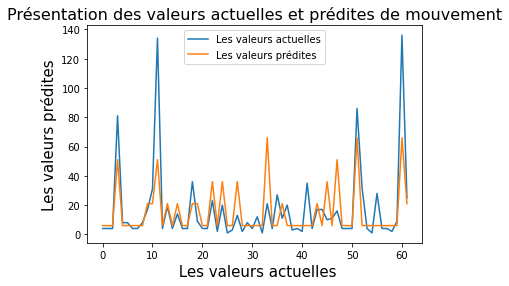

In [136]:
plt.plot(y_test, label='Les valeurs actuelles')
plt.plot(y_pred_mvt2, label='Les valeurs prédites') 
plt.xlabel(' Les valeurs actuelles',fontsize=15)
plt.ylabel('Les valeurs prédites',fontsize=15)
plt.title("Présentation des valeurs actuelles et prédites de mouvement",fontsize=16)
plt.legend()
plt.show()

## <font color='brown'> Présentation de Droite de regression </font>

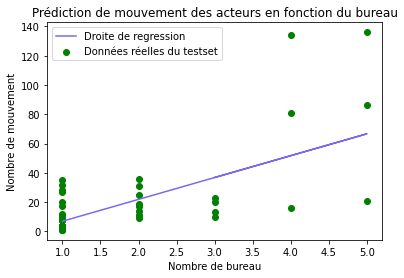

In [137]:
plt.plot(x_train, reg.predict(x_train), label='Droite de regression',color ='mediumslateblue')
plt.scatter(x_test, y_test, label='Données réelles du testset', color='green')
plt.xlabel('Nombre de bureau')
plt.ylabel('Nombre de mouvement')
plt.title('Prédiction de mouvement des acteurs en fonction du bureau')
plt.legend()
plt.show()

## <font color='brown'> Présentation des Scores obtenus </font>

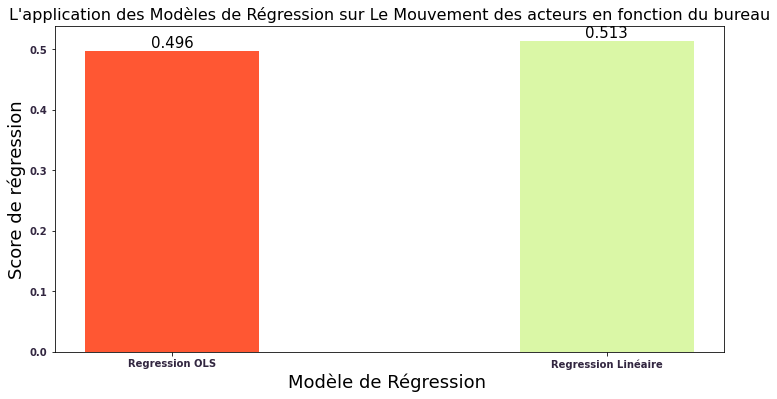

In [138]:
x = ['Regression OLS','Regression Linéaire']
y =[score_mvt1,score_mvt2]


fig, ax = plt.subplots(figsize = (12,6))
color_list = ['#FF5733', '#DAF7A6']

pps = ax.bar(x, y, width= 0.4, align='center',color = color_list)

for p in pps:
    plt.annotate(format(p.get_height(), '.3f'),  
                   (p.get_x() + p.get_width() / 2,  
                    p.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')
    
plt.title("L'application des Modèles de Régression sur Le Mouvement des acteurs en fonction du bureau",fontsize=16)

plt.xlabel('Modèle de Régression ',fontsize=18)
plt.ylabel('Score de régression',fontsize=18)
plt.xticks(color='#322640',fontweight='bold')
plt.yticks(color='#322640',fontweight='bold')

plt.show()

## <font color='brown'> Modèle de Classification KNeighbors </font>


### <font color='cornflowerblue'> Classification 1</font>

In [139]:
md=KNeighborsClassifier(n_neighbors=3)

In [140]:
train1=df_mvt[['nb_br']]
test1=df_mvt[['nb_mvt']]

In [141]:
x_train1, x_test1, y_train1 , y_test1 =train_test_split(train1,test1,test_size=0.2,random_state=103)

In [142]:
md.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [143]:
score1=md.score(x_test1, y_test1)
score1

0.45161290322580644

In [144]:
def mvt(md, nb_br):
    x=np.array([nb_br]).reshape(1, 1)
    print("le nombre de mouvements prévu est :", md.predict(x))
    
mvt(md,4)    

le nombre de mouvements prévu est : [16]


### <font color='cornflowerblue'> Classification 2</font>

In [145]:
df_mvt['type_acteur']=df_mvt['TYPE'].replace(['Emp','Tns'],[1,2],inplace=False)

In [146]:
knn=KNeighborsClassifier(n_neighbors=5)

In [147]:
train2=df_mvt[['nb_br','nb_mvt']]
test2=df_mvt[['type_acteur']]

In [148]:
x_train2, x_test2, y_train2 , y_test2 =train_test_split(train2,test2,test_size=0.2,random_state=31)

In [149]:
knn.fit(x_train2, y_train2)

KNeighborsClassifier()

In [150]:
score2=knn.score(x_test2, y_test2)
score2

0.9516129032258065

In [151]:
def type_acteur(knn, nb_br,nb_mvt):
    y=np.array([nb_br,nb_mvt]).reshape(1, 2)
    type_prévu=knn.predict(y)
    if(type_prévu==1):
        acteur="Emp"
    else:
        acteur="Tns"
    print("le type d'acteur prévu est :",type_prévu,"=> Donc notre acteur est un :",acteur)
    print(knn.predict_proba(y))
    
type_acteur(knn,3,62)   

le type d'acteur prévu est : [1] => Donc notre acteur est un : Emp
[[0.6 0.4]]


## <font color='brown'> Présentation des Scores obtenus </font>

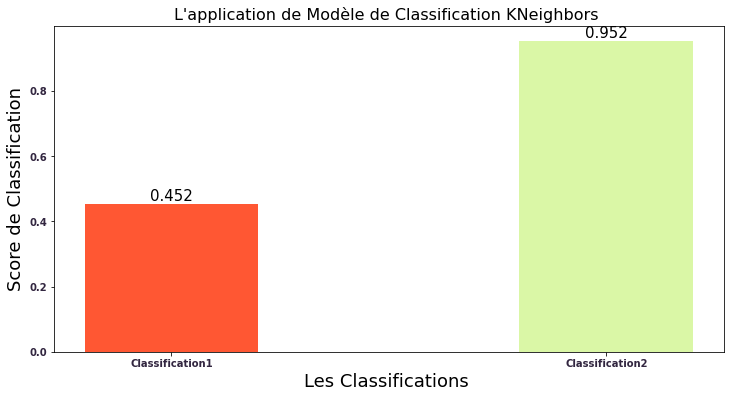

In [152]:
x = ['Classification1','Classification2']
y =[score1,score2]


fig, ax = plt.subplots(figsize = (12,6))
color_list = ['#FF5733', '#DAF7A6']

pps = ax.bar(x, y, width= 0.4, align='center',color = color_list)

for p in pps:
    plt.annotate(format(p.get_height(), '.3f'),  
                   (p.get_x() + p.get_width() / 2,  
                    p.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points')
    
plt.title("L'application de Modèle de Classification KNeighbors ",fontsize=16)

plt.xlabel('Les Classifications ',fontsize=18)
plt.ylabel('Score de Classification',fontsize=18)
plt.xticks(color='#322640',fontweight='bold')
plt.yticks(color='#322640',fontweight='bold')

plt.show()